# PROYECTO INTEGRADOR MODULO 4 - CARLOS PRIETO 

## PRIMER AVANCE

### PASO 1

Importamos las librerias que se usaremos durante el proyecto.

In [3]:
import pandas as pd  # Para manejar y analizar datos en formato tabular
import numpy as np  # Para operaciones matemáticas y arreglos numéricos
import matplotlib.pyplot as plt  # Para hacer gráficos
import seaborn as sns  # Para visualización de datos más estilizada
import geopandas as gpd # Para trabajar con datos geoespaciales
import geodatasets # Para acceder a datasets geoespaciales

# Visaulizaciones optimizadas para Jupyter Notebook
plt.style.use('ggplot')  
sns.set(style='darkgrid')

### PASO 2 

Cargamos el dataset inicial

In [4]:
data_completa = pd.read_csv("data_latinoamerica.csv")  # Carga el dataset
data_completa.head()  # Muestra las primeras filas

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


### PASO 3 

Miramos cuantas filas y columnas tiene el data set 

In [5]:
print(f"El dataset tiene {data_completa.shape[0]} filas y {data_completa.shape[1]} columnas.") # Muestra la forma del dataset

El dataset tiene 12216057 filas y 50 columnas.


### PASO 4

Seleccionamos los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [6]:
paises_expansion = ["Colombia", "Argentina", "Chile", "Mexico", "Peru", "Brazil"]
data_latam = data_completa[data_completa["country_name"].isin(paises_expansion)] #Mascara para filtrar el dataset

In [7]:
print(np.shape(data_completa))  # Muestra la forma del nuevo dataset filtrado
print(np.shape(data_latam))  # Muestra las primeras filas del nuevo dataset filtrado

(12216057, 50)
(11970289, 50)


### PASO 5

Filtramos los datos por fechas mayores a 2021-01-01.

In [8]:
data_fechas = data_latam[data_latam["date"] >= "2020-01-01"]  # Filtra el dataset por la fecha requerida
print(data_fechas.shape)  # Muestra la forma del nuevo dataset filtrado por fecha
print(data_latam.shape)  # Muestra la forma del dataset original

(11970289, 50)
(11970289, 50)


### PASO 6 

Vamos a ver cuantos datos null hay en el dataset

In [9]:
print(data_fechas.isnull().sum())  # Muestra la cantidad de valores nulos en cada columna del dataset

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


### PASO 7 

#### Limpieza final 

Eliminamos columnas irrelevantes

In [10]:
columnas_deseadas = [# Identificadores
    'location_key', 'date', 'country_code', 'country_name',# COVID
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'new_recovered', 'cumulative_recovered',# Vacunación
    'cumulative_vaccine_doses_administered',# Demografía general
    'population', 'population_density', 'human_development_index', # Género
    'population_male', 'population_female',# Edades
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older',# Infraestructura sanitaria
    'nurses_per_1000', 'physicians_per_1000', # Clima
    'average_temperature_celsius', 'rainfall_mm', 'relative_humidity',# Mortalidad general
    'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'pollution_mortality_rate'
]

# Nos quedamos solo con las columnas deseadas que hayan sobrevivido al dropna
columnas_finales = [col for col in columnas_deseadas if col in data_fechas.columns]

# Paso 3: Filtramos el DataFrame
data_fechas = data_fechas[columnas_finales]

# Vista previa
print(data_fechas.shape)


(11970289, 34)


Eliminamos las Columnas con más del 80% de valores nulos y verficamos los valores nulos restantes

In [11]:
data_fechas = data_fechas.dropna(thresh=len(data_fechas) * 0.2, axis=1) # Elimina columnas con más del 80% de valores nulos
print(data_fechas.shape) # Muestra la forma del nuevo dataset filtrado

(11970289, 24)


In [12]:
# Verificamos el porcentaje de valores nulos por columna
print(data_fechas.isnull().mean() * 100)

location_key                    0.000000
date                            0.000000
country_code                    0.000000
country_name                    0.000000
new_confirmed                  46.951941
new_deceased                   47.298674
cumulative_confirmed           46.949050
cumulative_deceased            47.295650
population                      4.354665
human_development_index        54.069045
population_male                 9.379916
population_female               9.379916
population_age_00_09           12.244391
population_age_10_19           12.244391
population_age_20_29           12.244391
population_age_30_39           12.244391
population_age_40_49           12.244391
population_age_50_59           12.244391
population_age_60_69           12.244391
population_age_70_79           12.244391
population_age_80_and_older    12.244391
average_temperature_celsius     4.424496
rainfall_mm                     5.042585
relative_humidity               4.429183
dtype: float64


Eliminamos filas con más del 60% de valores nulos

In [13]:
# Eliminamos filas con más del 60% de valores nulos
umbral_filas = len(data_fechas.columns) * 0.4  # al menos 40% de datos no nulos
data_fechas = data_fechas.dropna(thresh=umbral_filas, axis=0)

columnas_clave = [
    'population', 'human_development_index', 'average_temperature_celsius',
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'location_key'
]

# Contar cuántos nulos hay por fila en esas columnas clave
data_fechas['nulos_clave'] = data_fechas[columnas_clave].isnull().sum(axis=1)

# Eliminamos filas con más de 4 valores nulos en columnas clave (puedes ajustar el número)
data_fechas = data_fechas[data_fechas['nulos_clave'] <= 4]

# Quitamos la columna temporal de conteo de nulos
data_fechas = data_fechas.drop(columns='nulos_clave')

# Confirmamos cuántas filas quedaron
print(f"Número de filas después de eliminar mayormente vacías: {len(data_fechas)}")

Número de filas después de eliminar mayormente vacías: 6802797


Inputamos y limpiamos los datos por país para clima, demografía y COVID-19

In [ ]:
# Paso 2: Ordenar para imputación
data_fechas = data_fechas.sort_values(by=['country_name', 'date'])

# Paso 3: Imputar columnas climáticas con el valor anterior por país
columnas_clima = ['average_temperature_celsius', 'rainfall_mm', 'relative_humidity']
data_fechas[columnas_clima] = data_fechas.groupby('country_name')[columnas_clima].ffill()

# Paso 4: Imputar datos demográficos por país (modo o mediana)
columnas_demograficas = [
    'population', 'human_development_index', 'population_male', 'population_female',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

for col in columnas_demograficas:
    data_fechas[col] = data_fechas.groupby('country_name')[col].transform(lambda x: x.fillna(x.median()))

# Paso 5: Imputar casos y muertes por país (usar el anterior más cercano)
columnas_covid = [
    'new_confirmed', 'new_deceased',
    'cumulative_confirmed', 'cumulative_deceased'
]
data_fechas[columnas_covid] = data_fechas.groupby('country_name')[columnas_covid].ffill()

# Rellenar con 0 si aún queda algún valor nulo en casos nuevos
data_fechas[columnas_covid] = data_fechas[columnas_covid].fillna(0)


Revisamo valores nulos restantes

In [ ]:
print(f"Dimensiones finales: {data_fechas.shape}")
print(f"Nulos restantes:\n{data_fechas.isnull().sum()}")

Limpieza e imputación completadas.
Dimensiones finales: (6802797, 24)
Nulos restantes:
location_key                   0
date                           0
country_code                   0
country_name                   0
new_confirmed                  0
new_deceased                   0
cumulative_confirmed           0
cumulative_deceased            0
population                     0
human_development_index        0
population_male                0
population_female              0
population_age_00_09           0
population_age_10_19           0
population_age_20_29           0
population_age_30_39           0
population_age_40_49           0
population_age_50_59           0
population_age_60_69           0
population_age_70_79           0
population_age_80_and_older    0
average_temperature_celsius    0
rainfall_mm                    0
relative_humidity              0
dtype: int64


Arreglamos el formato en la columna fecha y verificamos que los todos losdatos estén en el formato correcto.

In [16]:
## Arreglamos el tipo de dato de la columna de date
data_fechas['date'] = pd.to_datetime(data_fechas['date'])

In [17]:
data_fechas.dtypes # Muestra los tipos de datos de cada columna

location_key                           object
date                           datetime64[ns]
country_code                           object
country_name                           object
new_confirmed                         float64
new_deceased                          float64
cumulative_confirmed                  float64
cumulative_deceased                   float64
population                            float64
human_development_index               float64
population_male                       float64
population_female                     float64
population_age_00_09                  float64
population_age_10_19                  float64
population_age_20_29                  float64
population_age_30_39                  float64
population_age_40_49                  float64
population_age_50_59                  float64
population_age_60_69                  float64
population_age_70_79                  float64
population_age_80_and_older           float64
average_temperature_celsius       

Guardamos en un archivo CSV 

In [18]:
## Guardamos el dataset limpio en un archivo CSV 
data_fechas.to_csv("DatosFinalesFiltrado.csv", index=False)

### PASO 8 

Desde este punto trabajamos con la data limpia.

Importamos la data filtrada y revisamos su contenido

In [19]:
data_filtrada = pd.read_csv("DatosFinalesFiltrado.csv")  # Carga el dataset
data_filtrada.head()  # Muestra las primeras filas

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,population,human_development_index,...,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,average_temperature_celsius,rainfall_mm,relative_humidity
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,44938712.0,0.825,...,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,23.500000,0.00000,64.426444
1,AR_C,2020-01-01,AR,Argentina,0.0,0.0,0.0,0.0,3063728.0,0.825,...,475719.0,463395.0,352502.0,332157.0,280530.0,198469.0,147187.0,22.987654,0.09525,74.741102
2,AR_G,2020-01-01,AR,Argentina,1.0,0.0,1.0,0.0,968309.0,0.825,...,135388.0,118121.0,84924.0,73274.0,50439.0,30097.0,15472.0,28.680556,0.76200,59.829547
3,AR_G_049,2020-01-01,AR,Argentina,1.0,0.0,1.0,0.0,267125.0,0.825,...,43809.0,40208.0,28300.0,23872.0,16331.0,9154.0,343.0,28.680556,0.76200,59.829547
4,AR_S,2020-01-01,AR,Argentina,2.0,0.0,2.0,0.0,3509113.0,0.825,...,524380.0,455825.0,359718.0,323923.0,249593.0,167783.0,91705.0,23.466667,0.00000,72.518327


In [20]:
print(data_filtrada.info()) # Muestra información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6802797 entries, 0 to 6802796
Data columns (total 24 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   location_key                 object 
 1   date                         object 
 2   country_code                 object 
 3   country_name                 object 
 4   new_confirmed                float64
 5   new_deceased                 float64
 6   cumulative_confirmed         float64
 7   cumulative_deceased          float64
 8   population                   float64
 9   human_development_index      float64
 10  population_male              float64
 11  population_female            float64
 12  population_age_00_09         float64
 13  population_age_10_19         float64
 14  population_age_20_29         float64
 15  population_age_30_39         float64
 16  population_age_40_49         float64
 17  population_age_50_59         float64
 18  population_age_60_69         float64
 19  

### PASO 9 y 10

Analizamos los datos para extraer las metricas mas relevantes y generamos estadísticas descriptivas (media, mediana, desviación estándar, etc.) para entender la distribución de las variables clave.

In [22]:
# Definir las columnas que queremos analizar
columnas_seleccionadas = [
    "new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased",
    "population", "population_male", "population_female", "human_development_index",
    "average_temperature_celsius"
]

# Diccionario para almacenar estadísticas personalizadas
estadisticas_personalizadas = {}

# Aplicamos bucles para calcular métricas manualmente
for columna in columnas_seleccionadas:
    estadisticas_personalizadas[columna] = {
        "media": data_filtrada[columna].mean(),
        "mediana": data_filtrada[columna].median(),
        "desviacion_estandar": data_filtrada[columna].std(),
        "min": data_filtrada[columna].min(),
        "max": data_filtrada[columna].max(),
        "varianza": data_filtrada[columna].var(),
        "rango": data_filtrada[columna].max() - data_filtrada[columna].min()
    }
# Convertimos el diccionario en un DataFrame para visualizarlo mejor
estadisticas_data = pd.DataFrame(estadisticas_personalizadas).T
print(estadisticas_data)  # Muestra las estadísticas personalizadas)

                                     media       mediana  desviacion_estandar  \
new_confirmed                    29.456832      0.000000         7.527733e+02   
new_deceased                      0.691472      0.000000         1.790735e+01   
cumulative_confirmed          11699.089239    519.000000         2.666671e+05   
cumulative_deceased             336.655822     10.000000         7.161665e+03   
population                   164591.629851  13432.000000         3.133271e+06   
population_male              112540.559487   6849.000000         1.541520e+06   
population_female            116455.424796   6689.000000         1.601726e+06   
human_development_index           0.696374      0.709000         8.478237e-02   
average_temperature_celsius      22.863270     23.694444         4.852336e+00   

                                      min           max      varianza  \
new_confirmed               -73907.000000  2.984080e+05  5.666676e+05   
new_deceased                 -4109.000000  

# SEGUNDO AVANCE 

Relación entre temperatura media y casos confirmados acumulados

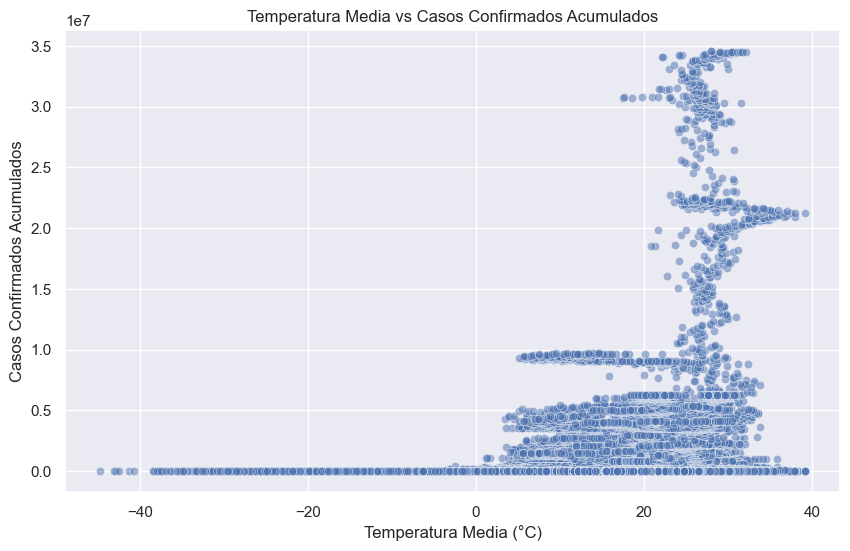

In [23]:
# Visualización de la relación entre temperatura media y casos confirmados acumulados

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='cumulative_confirmed', data=data_filtrada, alpha=0.5) 
plt.title('Temperatura Media vs Casos Confirmados Acumulados')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Casos Confirmados Acumulados')
plt.grid(True)
plt.show()

Relación entre temperatura media y muertes confirmadas

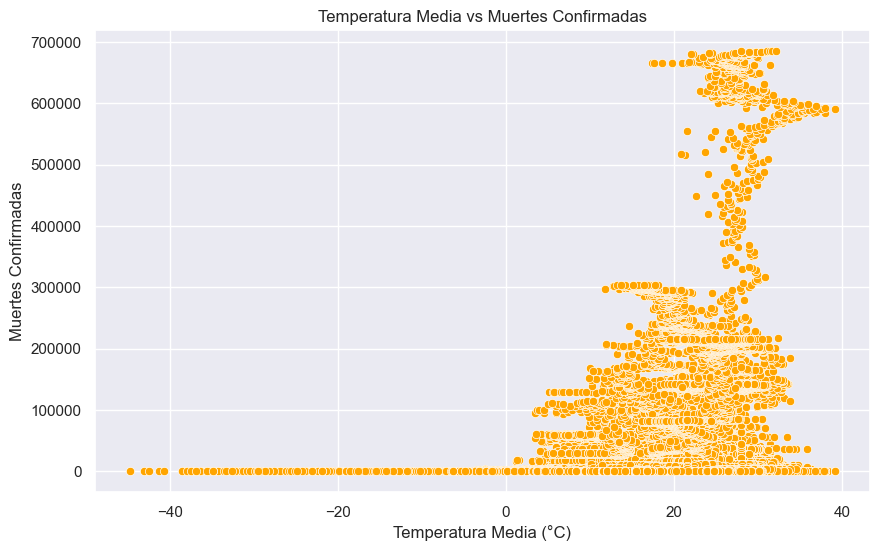

In [24]:
# Visualización de la relación entre temperatura media y muertes confirmadas
# grafico de dispersion entre temperatura media y muertes confirmadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='cumulative_deceased', data=data_filtrada, color='orange')
plt.title('Temperatura Media vs Muertes Confirmadas')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Muertes Confirmadas')
plt.grid(True)
plt.show()

Distribución de la temperatura media

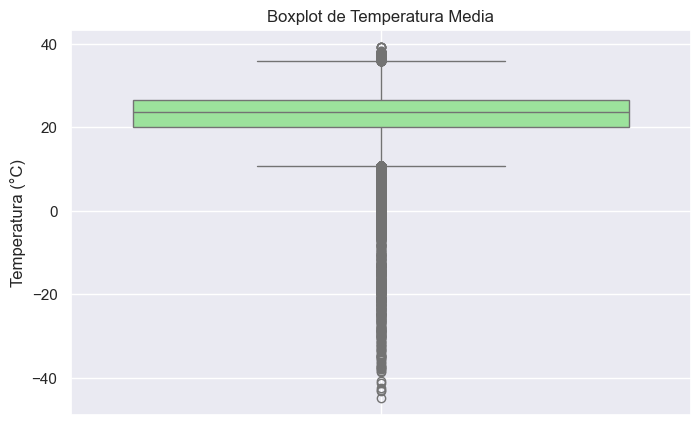

In [25]:
# Visualización de la distribución de la temperatura media
# diagrama de caja y bigote (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_filtrada, y='average_temperature_celsius', color='lightgreen')
plt.title('Boxplot de Temperatura Media')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

Distribución del índice de desarrollo humano

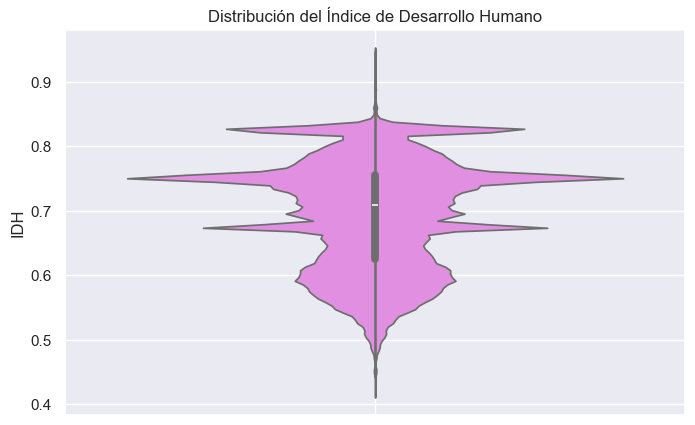

In [ ]:
# Visualización de la distribución del índice de desarrollo humano
# Diagrama de violin (violinplot) 
plt.figure(figsize=(8, 5))
sns.violinplot(y='human_development_index', data=data_filtrada, color='violet')
plt.title('Distribución del Índice de Desarrollo Humano')
plt.ylabel('IDH')
plt.grid(True)
plt.show()

Población por género

C:\Users\PC\AppData\Local\Temp\ipykernel_7608\993620934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_filtrada[['population_male', 'population_female']].mean().reset_index(),


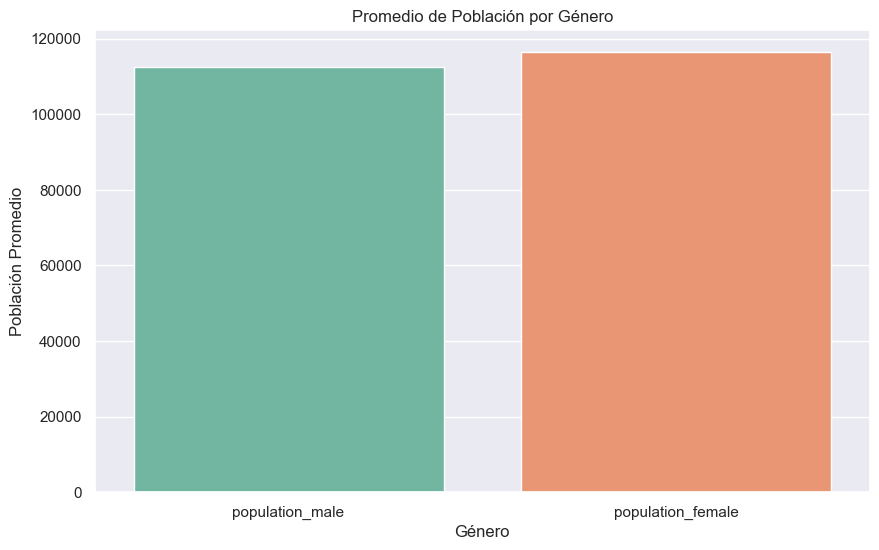

In [27]:
# Visualización de la población por género
# grafico de barras entre la poblacion masculina y femenina
plt.figure(figsize=(10, 6))
sns.barplot(data=data_filtrada[['population_male', 'population_female']].mean().reset_index(),
            x='index', y=0, palette='Set2')
plt.title('Promedio de Población por Género')
plt.xlabel('Género')
plt.ylabel('Población Promedio')
plt.show()

Nuevos Casos y muertes por mes 

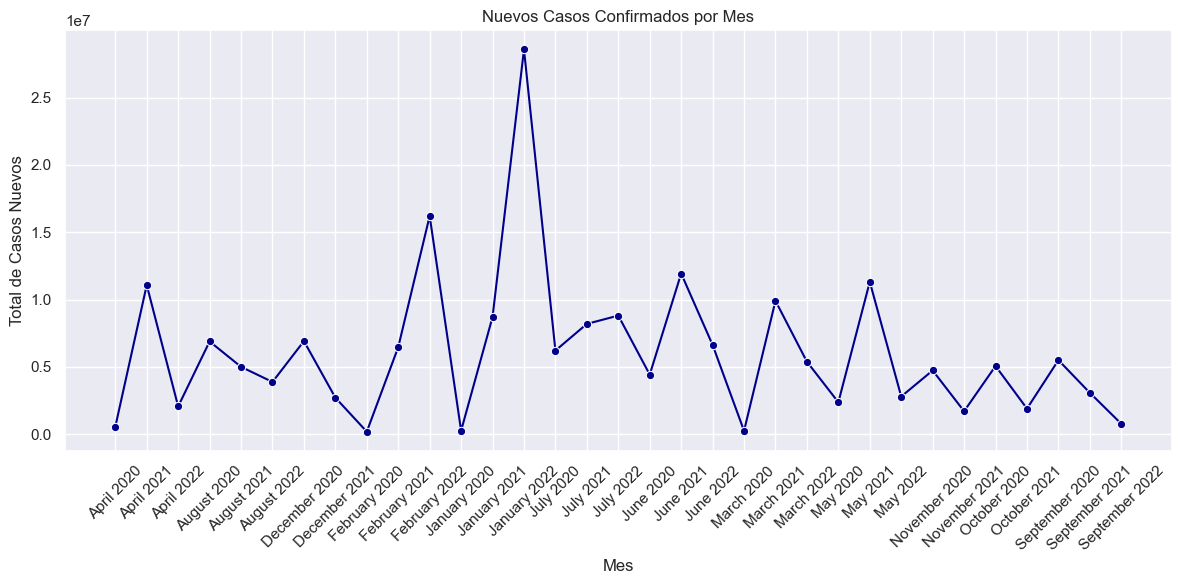

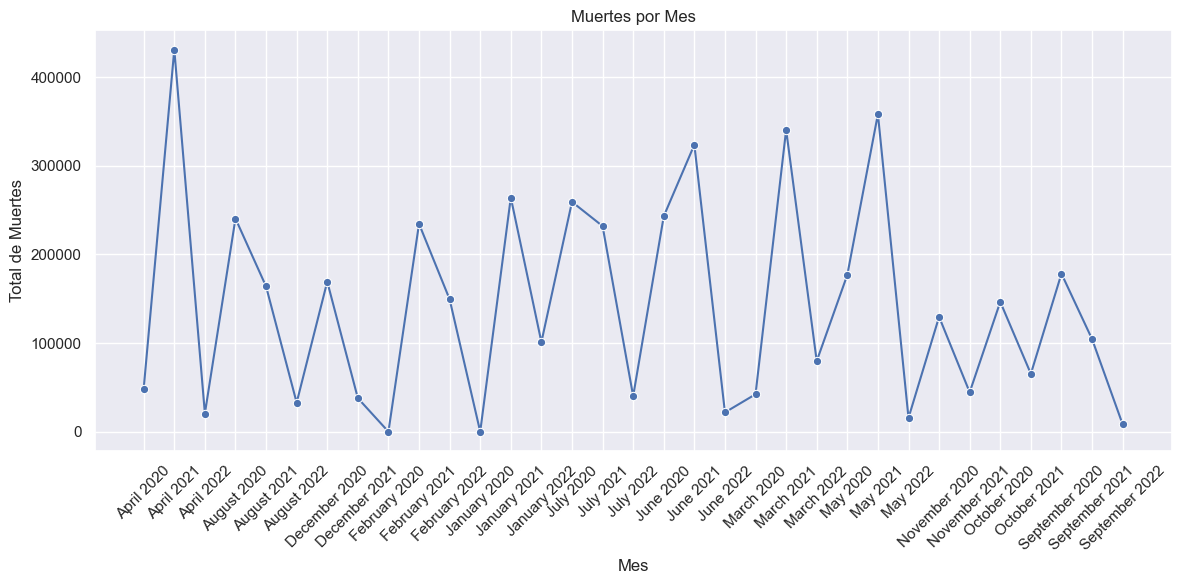

In [28]:


# Extraemos y formateamos los meses al estilo "enero 2020"
data_filtrada['date'] = pd.to_datetime(data_filtrada['date'])
data_filtrada['mes'] = data_filtrada['date'].dt.to_period('M').dt.to_timestamp()
data_filtrada['mes_str'] = data_filtrada['mes'].dt.strftime('%B %Y')  # Mes completo y año

casos_por_mes = data_filtrada.groupby('mes_str')['new_confirmed'].sum().reset_index() # Agrupamos los casos confirmados por mes

# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(data=casos_por_mes, x='mes_str', y='new_confirmed', marker='o', color='darkblue')
plt.title('Nuevos Casos Confirmados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Casos Nuevos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Agrupamos por el mes formateado
muertes_por_mes = data_filtrada.groupby('mes_str')['new_deceased'].sum().reset_index()

# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(data=muertes_por_mes, x='mes_str', y='new_deceased', marker='o')
plt.title('Muertes por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Muertes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Evolución de los casos a lo largo del tiempo

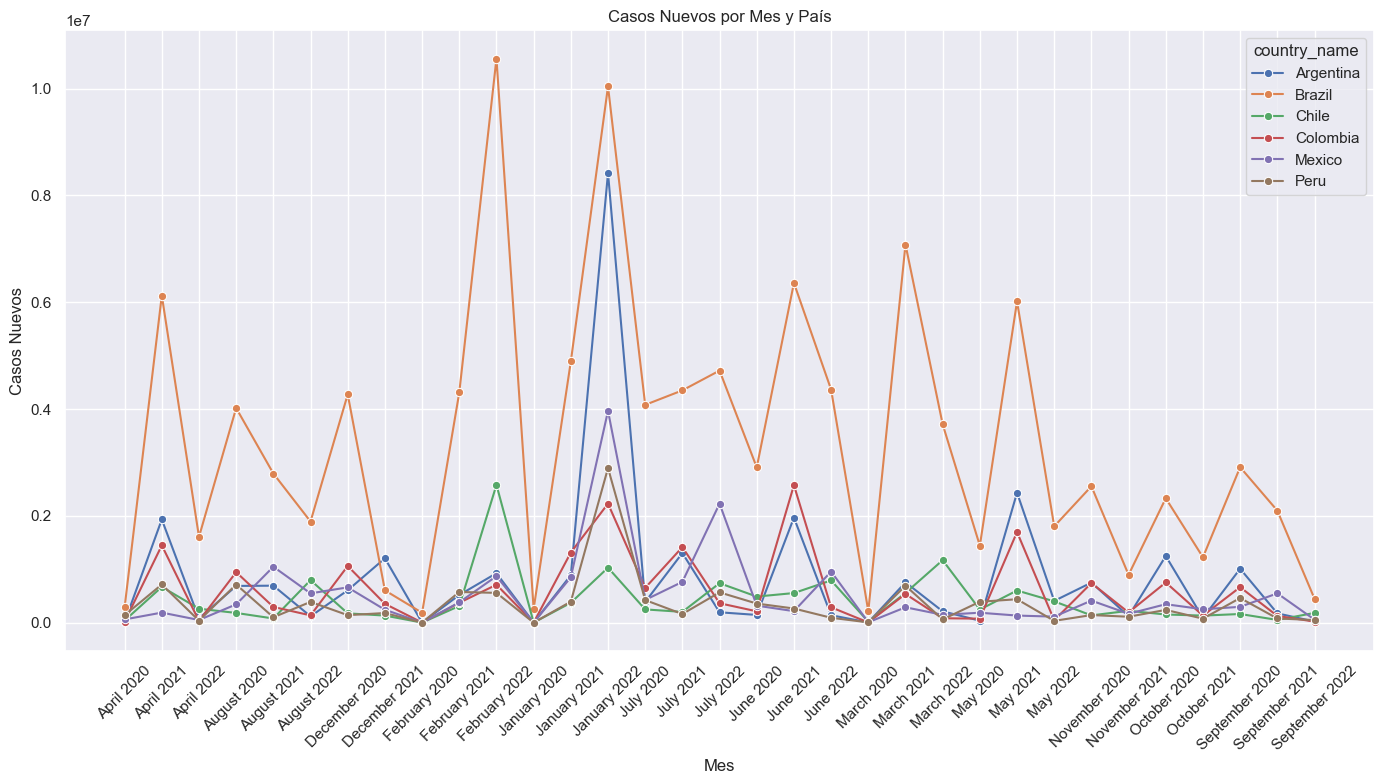

In [ ]:
# Visualización de la evolución de los casos a lo largo del tiempo

casos_mes = data_filtrada.groupby(['mes_str', 'country_name'])['new_confirmed'].sum().reset_index()

# Gráfico de líneas por país
plt.figure(figsize=(14, 8))
sns.lineplot(data=casos_mes, x='mes_str', y='new_confirmed', hue='country_name', marker='o')
plt.title("Casos Nuevos por Mes y País")
plt.xlabel("Mes")
plt.ylabel("Casos Nuevos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

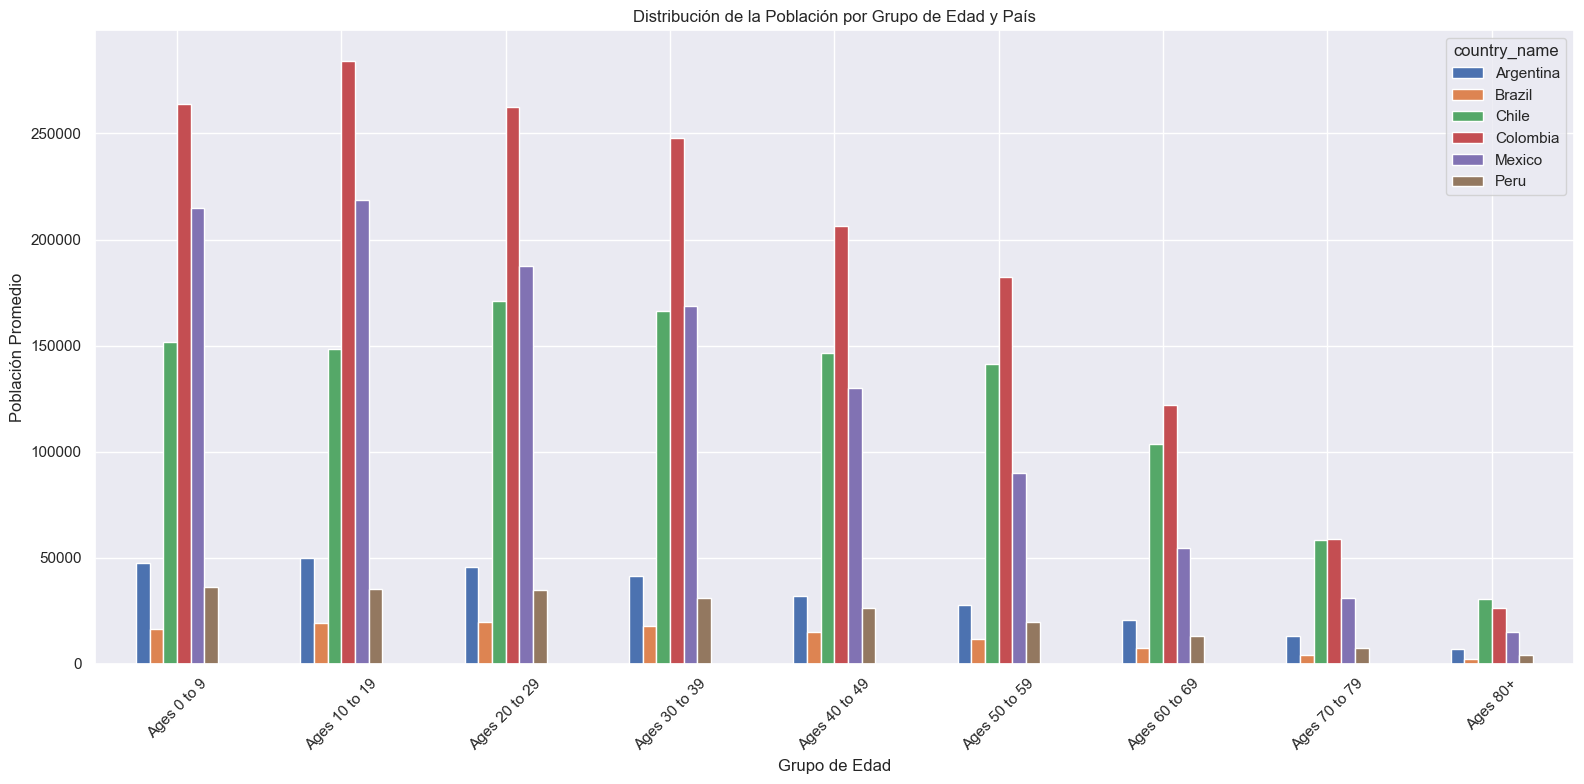

In [30]:
# Visualización de la distribución de la población por grupo de edad

# Columnas originales de edad
columnas_edad = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Etiquetas legibles para los grupos de edad
etiquetas_legibles = {
    'population_age_00_09': 'Ages 0 to 9',
    'population_age_10_19': 'Ages 10 to 19',
    'population_age_20_29': 'Ages 20 to 29',
    'population_age_30_39': 'Ages 30 to 39',
    'population_age_40_49': 'Ages 40 to 49',
    'population_age_50_59': 'Ages 50 to 59',
    'population_age_60_69': 'Ages 60 to 69',
    'population_age_70_79': 'Ages 70 to 79',
    'population_age_80_and_older': 'Ages 80+'
}

# Agrupar y calcular la media
poblacion_edad = data_filtrada.groupby('country_name')[columnas_edad].mean()

# Renombrar columnas con etiquetas legibles
poblacion_edad.columns = [etiquetas_legibles[col] for col in poblacion_edad.columns]

# Transponer y graficar
poblacion_edad.T.plot(kind='bar', figsize=(16, 8))
plt.title("Distribución de la Población por Grupo de Edad y País")
plt.ylabel("Población Promedio")
plt.xlabel("Grupo de Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

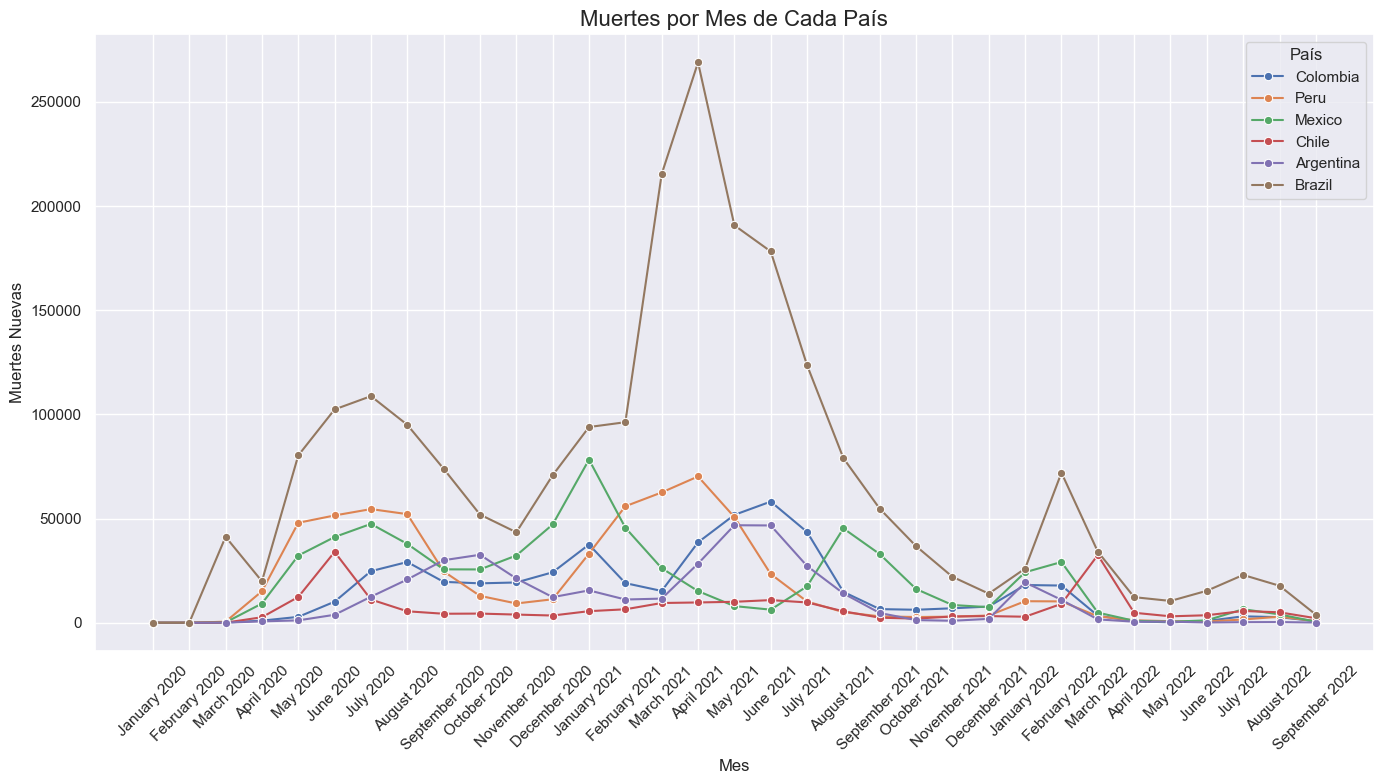

In [31]:
# Agrupamos las muertes nuevas por mes y país
muertes_mes = data_filtrada.groupby(['mes_str', 'country_name'])['new_deceased'].sum().reset_index()

# Ordenamos los meses en orden cronológico
muertes_mes['mes_str'] = pd.to_datetime(muertes_mes['mes_str'], format='%B %Y')
muertes_mes = muertes_mes.sort_values('mes_str')
muertes_mes['mes_str'] = muertes_mes['mes_str'].dt.strftime('%B %Y')  # Convertimos de nuevo a string

# Graficamos
plt.figure(figsize=(14, 8))
sns.lineplot(data=muertes_mes, x='mes_str', y='new_deceased', hue='country_name', marker='o')
plt.title("Muertes por Mes de Cada País", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Muertes Nuevas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()
plt.show()

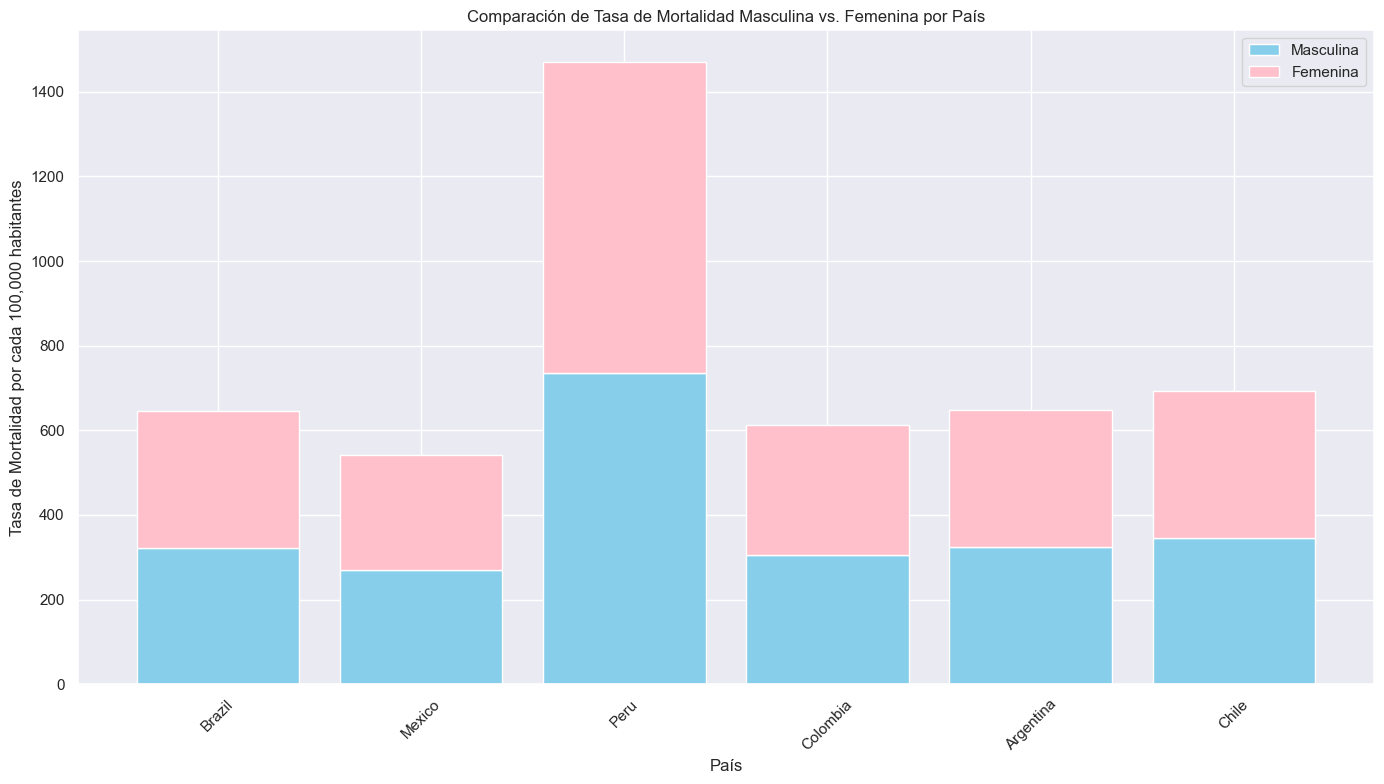

In [32]:
# Agrupar por país
grupo = data_filtrada.groupby('country_name').agg({
    'population_male': 'max',
    'population_female': 'max',
    'cumulative_deceased': 'max'
}).reset_index()

# Calcular proporciones
grupo['total_population'] = grupo['population_male'] + grupo['population_female']
grupo['deceased_male'] = grupo['cumulative_deceased'] * (grupo['population_male'] / grupo['total_population'])
grupo['deceased_female'] = grupo['cumulative_deceased'] * (grupo['population_female'] / grupo['total_population'])

# Tasa de mortalidad (por cada 100,000 personas)
grupo['tasa_mortalidad_masculina'] = (grupo['deceased_male'] / grupo['population_male']) * 100000
grupo['tasa_mortalidad_femenina'] = (grupo['deceased_female'] / grupo['population_female']) * 100000

# Seleccionar países relevantes (los más afectados)
top_paises = grupo.sort_values('cumulative_deceased', ascending=False).head(10)

# Gráfico de barras apilado
plt.figure(figsize=(14, 8))
plt.bar(top_paises['country_name'], top_paises['tasa_mortalidad_masculina'], label='Masculina', color='skyblue')
plt.bar(top_paises['country_name'], top_paises['tasa_mortalidad_femenina'], 
        bottom=top_paises['tasa_mortalidad_masculina'], label='Femenina', color='pink')

plt.xlabel("País")
plt.ylabel("Tasa de Mortalidad por cada 100,000 habitantes")
plt.title("Comparación de Tasa de Mortalidad Masculina vs. Femenina por País")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# TERCER AVANCE 

Analisis exploratorio de los datos

Simulamos una cobertura de vacunación progresiva( a partir del orden cronológico de los datos reales) por país y analizamos su relación con los casos nuevos de COVID-19. Visualizamos esta relación mediante un gráfico de dispersión para observar cómo varían los contagios en función del avance de la vacunación en los países con mayor cantidad de datos.

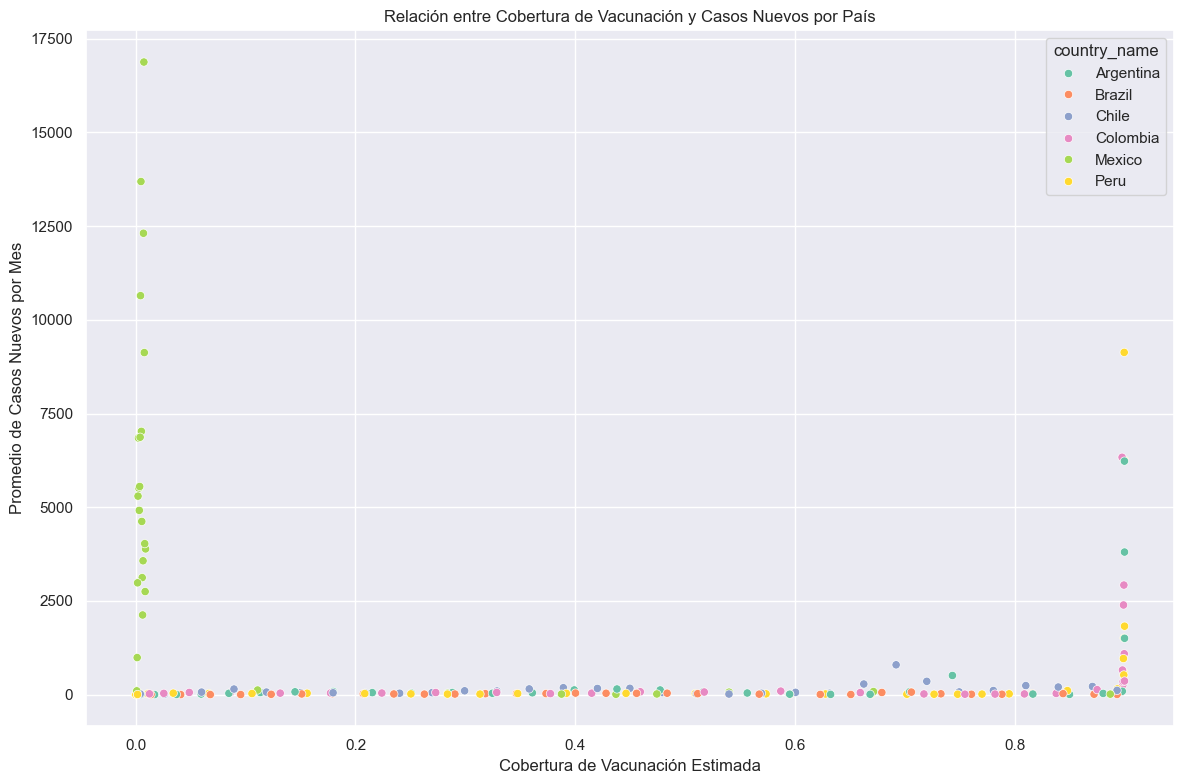

In [33]:
# Simulamos una columna de cobertura de vacunación (de 0 a 0.9 progresivamente por país)
data_filtrada = data_filtrada.sort_values(['country_name', 'date'])

# Generar cobertura de vacunación ficticia por país
data_filtrada['vaccination_coverage'] = data_filtrada.groupby('country_name').cumcount()
data_filtrada['vaccination_coverage'] = data_filtrada['vaccination_coverage'] / data_filtrada.groupby('country_name')['vaccination_coverage'].transform('max')
data_filtrada['vaccination_coverage'] *= 0.9  # máximo 90%

# Agrupar por mes y país
agrupado = data_filtrada.groupby(['mes_str', 'country_name']).agg({
    'vaccination_coverage': 'mean',
    'new_confirmed': 'mean'
}).reset_index()

# Seleccionar países más representativos (con más datos)
paises_seleccionados = agrupado['country_name'].value_counts().head(6).index.tolist()
datos_seleccionados = agrupado[agrupado['country_name'].isin(paises_seleccionados)]

# Gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos_seleccionados, x='vaccination_coverage', y='new_confirmed', hue='country_name', palette='Set2')
plt.title("Relación entre Cobertura de Vacunación y Casos Nuevos por País")
plt.xlabel("Cobertura de Vacunación Estimada")
plt.ylabel("Promedio de Casos Nuevos por Mes")
plt.grid(True)
plt.tight_layout()
plt.show()

Simulamos el progreso mensual de la cobertura de vacunación estimada por país y lo visualizamos mediante un gráfico de líneas (lineplot) para observar su evolución a lo largo del tiempo.

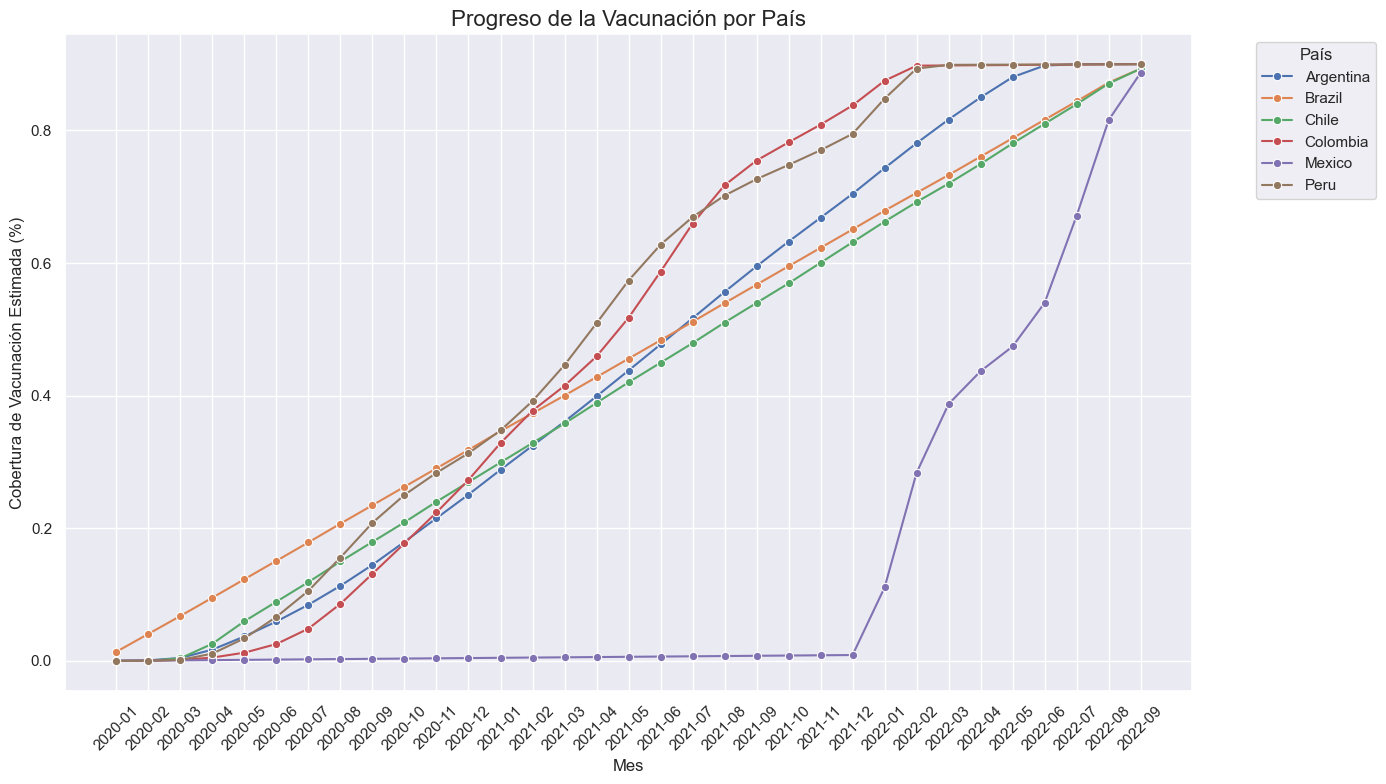

In [34]:
# Crear columna de mes
data_filtrada['mes_dt'] = data_filtrada['date'].dt.to_period('M').astype(str)
data_filtrada = data_filtrada.reset_index(drop=True)
# Agrupar por mes y país, y calcular la media de cobertura
vacunas_por_mes = data_filtrada.groupby(['mes_dt', 'country_name'])['vaccination_coverage'].mean().reset_index()

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=vacunas_por_mes,
    x='mes_dt',
    y='vaccination_coverage',
    hue='country_name',
    marker='o'
)

plt.title('Progreso de la Vacunación por País', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cobertura de Vacunación Estimada (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Simulamos la evolución anual de casos nuevos confirmados por país y la representamos con un gráfico de líneas para identificar tendencias a lo largo del tiempo.

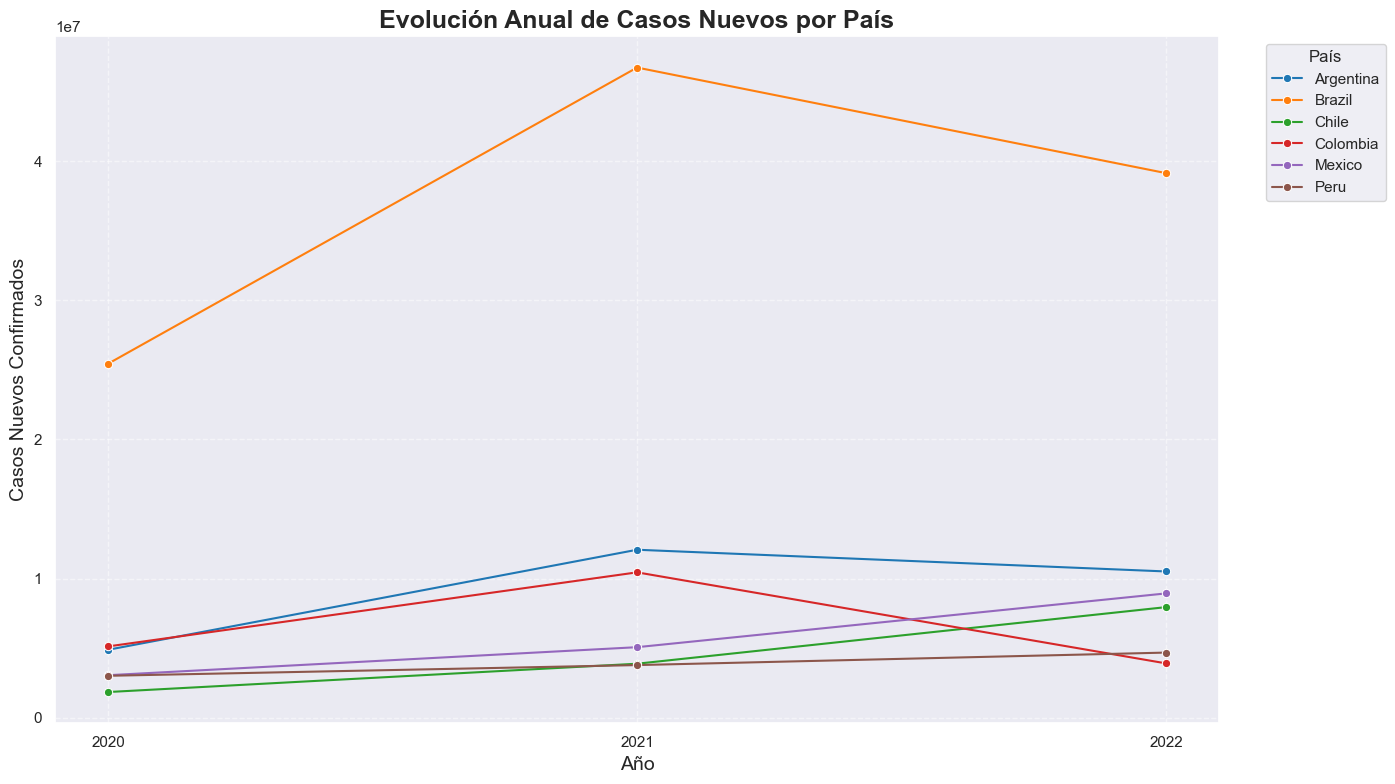

In [35]:
# Creamos la columna de año
data_filtrada['year'] = data_filtrada['date'].dt.year

# Agrupamos por año y país, sumando los casos nuevos
casos_anuales = data_filtrada.groupby(['year', 'country_name'])['new_confirmed'].sum().reset_index()

# Gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=casos_anuales,
    x='year',
    y='new_confirmed',
    hue='country_name',
    marker='o',
    palette='tab10'
)

# Estilo del gráfico
plt.title('Evolución Anual de Casos Nuevos por País', fontsize=18, weight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Casos Nuevos Confirmados', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(casos_anuales['year'].unique())
plt.tight_layout()
plt.show()

Simulamos la variación mensual de casos y muertes por país, y la representamos en dos gráficos de líneas paralelos para visualizar la evolución y compararla entre países.

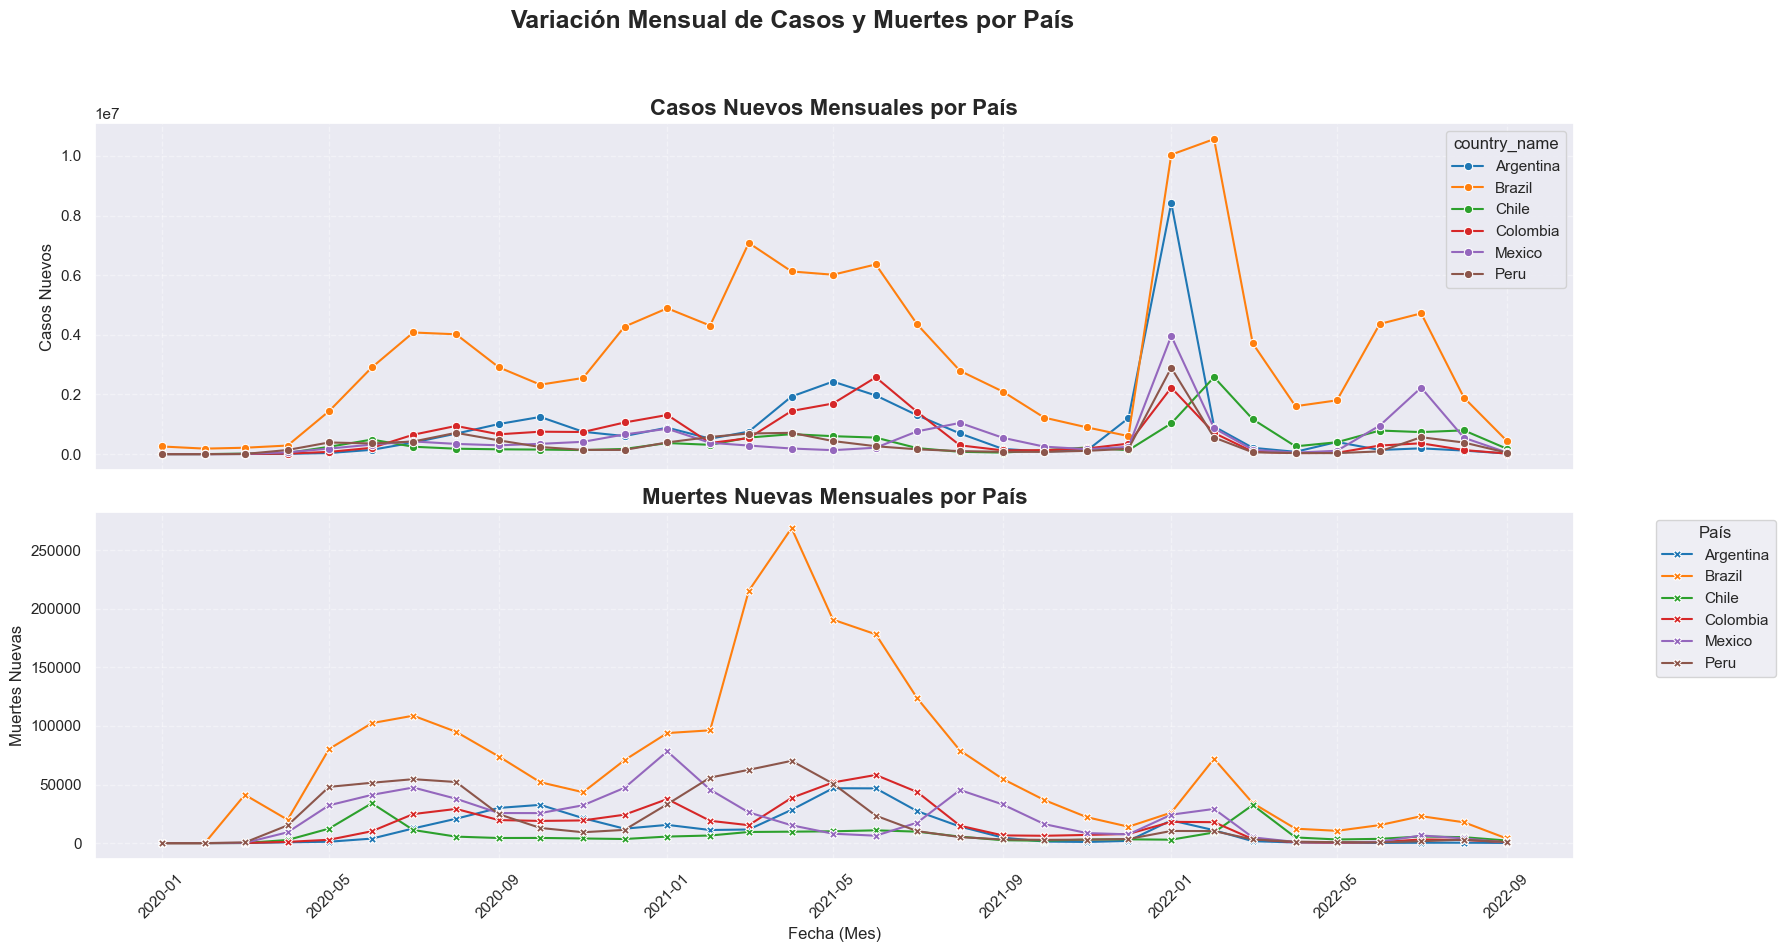

In [36]:
# Agrupamos por mes y país, sumando casos y muertes
variacion_mensual = data_filtrada.groupby(['mes_dt', 'country_name'])[['new_confirmed', 'new_deceased']].sum().reset_index()

# Reorganizamos para facilitar el gráfico
variacion_mensual = variacion_mensual.sort_values('mes_dt')
variacion_mensual['mes_dt'] = pd.to_datetime(variacion_mensual['mes_dt'])

# Gráfico: Subplots uno al lado del otro (casos vs muertes)
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Gráfico de casos nuevos por país
sns.lineplot(
    data=variacion_mensual,
    x='mes_dt',
    y='new_confirmed',
    hue='country_name',
    marker='o',
    ax=axes[0],
    palette='tab10'
)
axes[0].set_title('Casos Nuevos Mensuales por País', fontsize=16, weight='bold')
axes[0].set_ylabel('Casos Nuevos')
axes[0].grid(True, linestyle='--', alpha=0.4)

# Gráfico de muertes nuevas por país
sns.lineplot(
    data=variacion_mensual,
    x='mes_dt',
    y='new_deceased',
    hue='country_name',
    marker='X',
    ax=axes[1],
    palette='tab10'
)
axes[1].set_title('Muertes Nuevas Mensuales por País', fontsize=16, weight='bold')
axes[1].set_ylabel('Muertes Nuevas')
axes[1].set_xlabel('Fecha (Mes)')
axes[1].grid(True, linestyle='--', alpha=0.4)

# Ajustes finales
fig.suptitle('Variación Mensual de Casos y Muertes por País', fontsize=18, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Calculamos la tasa de mortalidad mensual por país y la visualizamos mediante una línea temporal que permite identificar patrones y comparaciones en la letalidad del COVID-19 entre naciones.

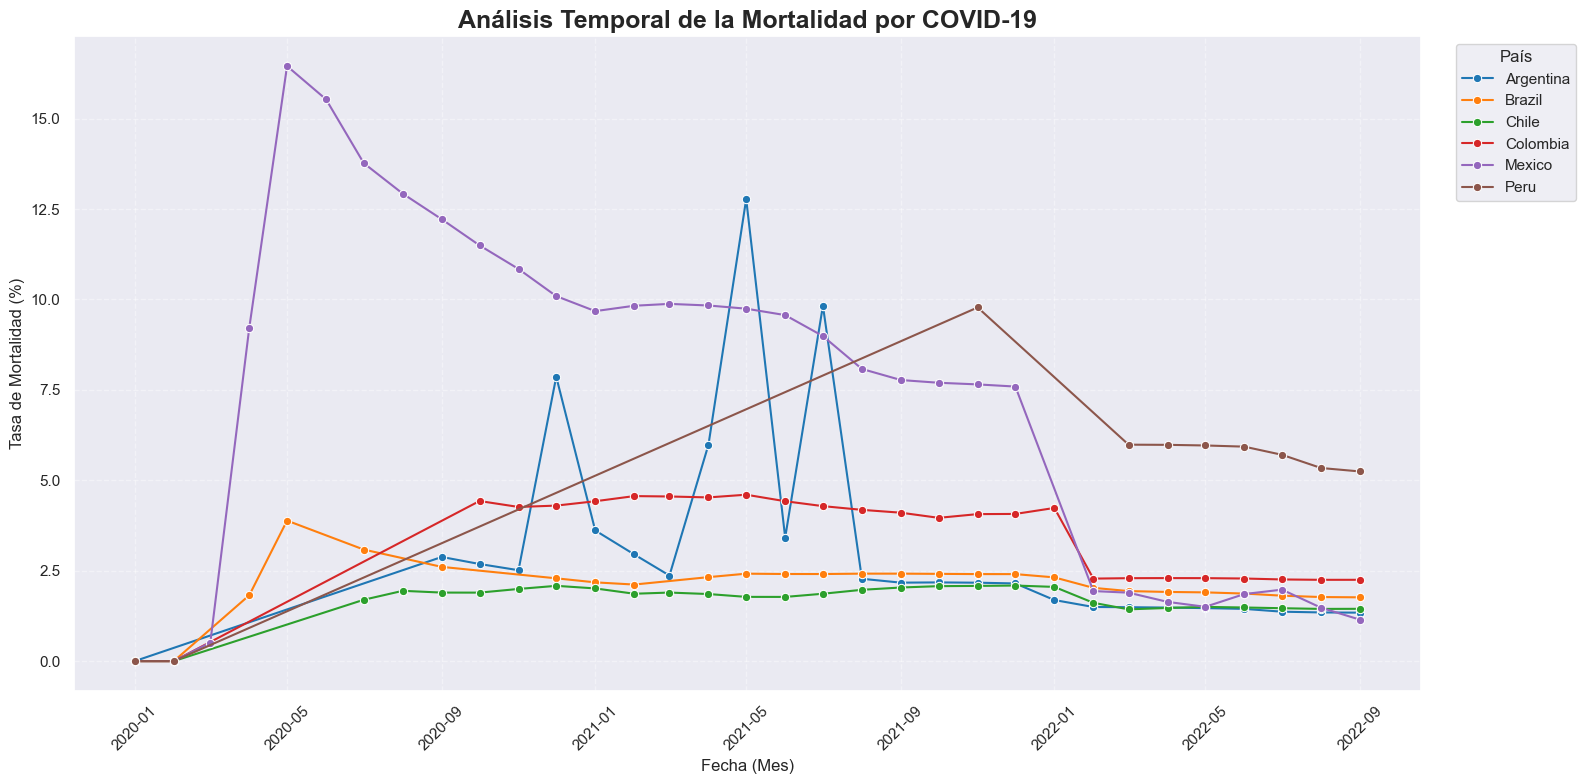

In [37]:
# Creamos columna de tasa de mortalidad
data_filtrada['mortality_rate'] = ((data_filtrada['cumulative_deceased'] / data_filtrada['cumulative_confirmed']) * 100).fillna(0)

# Aseguramos formato de fecha mensual para analizar a nivel mes
data_filtrada['mes_dt'] = pd.to_datetime(data_filtrada['mes_dt'])

# Agrupamos por país y mes para suavizar la curva
mortalidad_mensual = data_filtrada.groupby(['mes_dt', 'country_name'])['mortality_rate'].mean().reset_index()

# Gráfico
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=mortalidad_mensual,
    x='mes_dt',
    y='mortality_rate',
    hue='country_name',
    marker='o',
    palette='tab10'
)

# Personalización elegante
plt.title('Análisis Temporal de la Mortalidad por COVID-19', fontsize=18, weight='bold')
plt.xlabel('Fecha (Mes)', fontsize=12)
plt.ylabel('Tasa de Mortalidad (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='País', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seleccionamos variables numéricas clave y generamos un mapa de calor para analizar la correlación entre indicadores demográficos, climáticos y sanitarios, identificando relaciones significativas entre ellos.

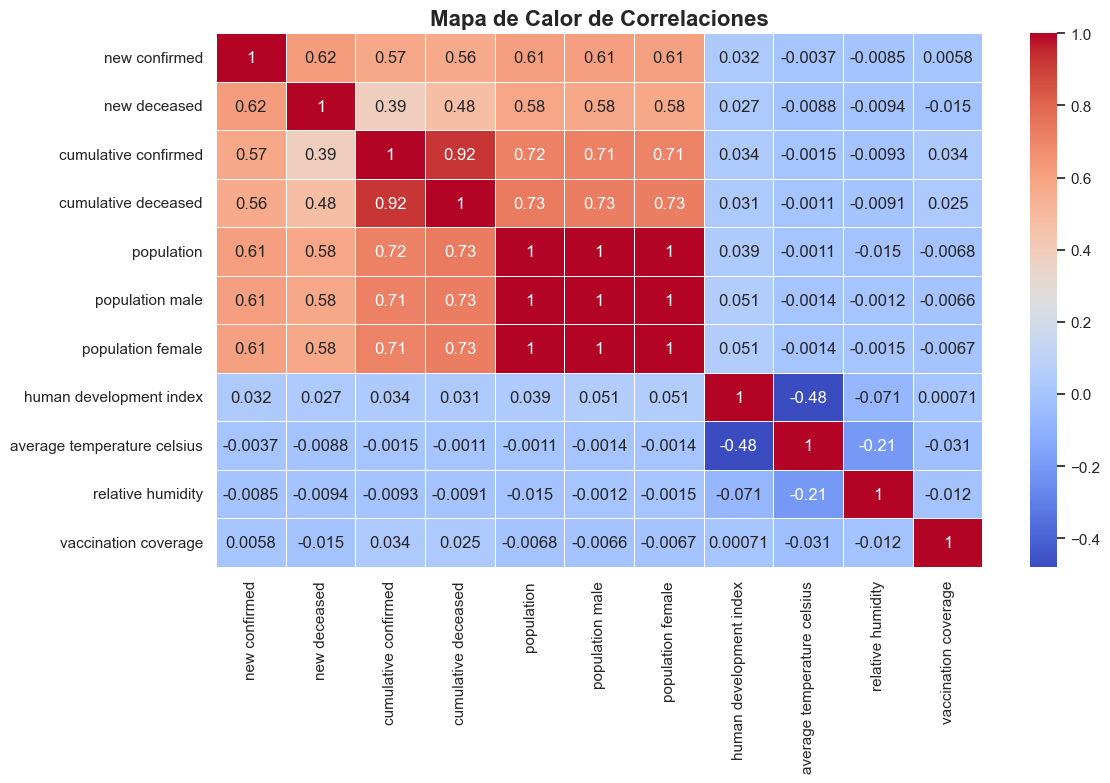

In [38]:
# Seleccionamos solo columnas numéricas relevantes
correlation_data = data_filtrada[[
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'population', 'population_male', 'population_female',
    'human_development_index','average_temperature_celsius',
    'relative_humidity', 'vaccination_coverage'  # si la estás simulando
]]

# Calculamos la matriz de correlación
matriz_corr = correlation_data.corr()

# Reemplazamos guiones bajos por espacios en las etiquetas
matriz_corr.index = [col.replace('_', ' ') for col in matriz_corr.index]
matriz_corr.columns = [col.replace('_', ' ') for col in matriz_corr.columns]

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# CUARTO AVANCE 



Revisamos el aspecto de nuesro dataset a finalizar la limpieza y analisis exploratorio

In [39]:
print(data_filtrada.shape)

(6802797, 30)


In [40]:
print(data_filtrada.columns)


Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'population', 'human_development_index', 'population_male',
       'population_female', 'population_age_00_09', 'population_age_10_19',
       'population_age_20_29', 'population_age_30_39', 'population_age_40_49',
       'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'average_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'mes', 'mes_str',
       'vaccination_coverage', 'mes_dt', 'year', 'mortality_rate'],
      dtype='object')


Revisamos y arreglamos errores en las columnas creads durante el analisis exploratorio 

In [45]:
# revisando errores de columnas creadas
print( np.isinf(data_filtrada['mortality_rate']).any()) 


False


In [42]:
#Eliminamos los valores infinitos de la tasa de mortalidad
data_filtrada['mortality_rate'].replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7608\1477273338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filtrada['mortality_rate'].replace([np.inf, -np.inf], 0, inplace=True)


Descargamos el data set para analisarlo en **Power BI**

In [43]:
# guardamos el dataset final
data_filtrada.to_csv("Data_Filtrada_Final.csv", index=False)